In [1]:
cd /home/chenxupeng/projects/DIP

/home/chenxupeng/projects/DIP


In [2]:
ls data/Examples/0/0

56.jpg*  KeyPoints.mat*


In [3]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from scipy import io
from glob import glob
from imageio import imread
from PIL import Image
from bokeh.palettes import Category20c
from IPython.display import IFrame
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [4]:
#setup figure template
figure_template_path = 'bin'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
#force reload of the module
reload(figure_template)
from figure_template import display_dataframe, embed_pdf_figure, embed_pdf_pages,std_plot,legendhandle

In [5]:
IFrame('https://drive.google.com/file/d/1ZicrcygOGhPLuJaUngOWu26Ov9WUhZ1I/preview', width=800, height=450)

# Train data

In [6]:
BoW_Training = io.loadmat('data/BoW_Training.mat')['data']
BoW_Training.shape
BoW_Training_x = BoW_Training[:,:50]
BoW_Training_y = BoW_Training[:,-2:]

(array([9.6077e+04, 3.5464e+04, 2.0254e+04, 1.2740e+04, 8.7450e+03,
        6.0120e+03, 4.4930e+03, 3.5740e+03, 2.8350e+03, 2.3190e+03,
        2.2450e+03, 1.4500e+03, 1.2730e+03, 1.0630e+03, 9.0100e+02,
        8.3800e+02, 7.2100e+02, 6.4400e+02, 5.7100e+02, 4.7700e+02,
        5.0000e+02, 3.7600e+02, 3.3200e+02, 3.1300e+02, 3.0400e+02,
        2.3900e+02, 2.4700e+02, 2.3400e+02, 2.0000e+02, 1.9000e+02,
        1.9700e+02, 1.7300e+02, 1.4600e+02, 1.3700e+02, 1.4800e+02,
        1.3500e+02, 1.1000e+02, 1.0000e+02, 1.0800e+02, 9.3000e+01,
        1.3200e+02, 8.5000e+01, 8.9000e+01, 7.7000e+01, 7.3000e+01,
        7.0000e+01, 7.0000e+01, 8.0000e+01, 7.8000e+01, 6.8000e+01]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

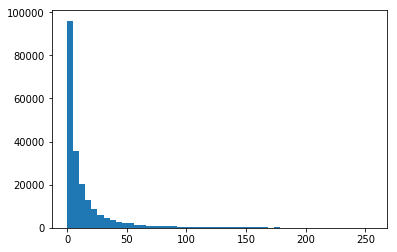

In [7]:
hist(BoW_Training_x.ravel(),bins=50)

In [8]:
pd.DataFrame(BoW_Training_x).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,...,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000,4156.000000
mean,17.098412,13.612849,15.994225,15.540664,10.350096,14.009865,17.706208,17.011309,16.616218,17.412175,...,18.759865,12.594562,14.715351,10.971367,14.696102,14.314004,13.428296,16.549326,18.252406,17.934312
std,34.151594,24.268028,31.194402,29.152093,19.900206,20.128938,33.057963,30.519712,29.630297,30.873341,...,33.972773,28.349307,22.730728,22.840827,23.125229,20.505766,24.643116,33.381004,29.780360,27.720146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000
50%,4.000000,6.000000,5.000000,6.000000,5.000000,8.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,3.000000,8.000000,4.000000,8.000000,8.000000,6.000000,4.000000,8.000000,9.000000
75%,16.000000,14.000000,15.000000,16.000000,11.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,20.000000,11.000000,17.000000,11.000000,17.000000,17.000000,14.000000,15.000000,20.000000,19.000000
max,254.000000,249.000000,250.000000,254.000000,236.000000,246.000000,255.000000,247.000000,254.000000,250.000000,...,250.000000,255.000000,246.000000,246.000000,251.000000,236.000000,247.000000,255.000000,254.000000,254.000000


In [9]:
pd.DataFrame(BoW_Training_x.ravel()).describe()

,0
count,207800.000000
mean,16.034995
std,28.431482
min,0.000000
25%,2.000000
50%,6.000000
75%,17.000000
max,255.000000


In [10]:
#pal = sns.cubehelix_palette(10,light=.9, dark=.1, reverse=True,
#                                        start=1, rot=-2)
pal = Category20c[10]
def get_color_table(labels):
    #labels = BoW_Training_y[:sample_num,0].astype('str')
    
    lut = dict(zip(map(str, np.unique(labels)), pal))
    colors = pd.Series(labels).map(lut)
    return colors,lut,np.unique(labels)

In [16]:
%matplotlib agg
%matplotlib agg
sample_num_start = 1000
sample_num_end = 2000
sample_select_arr = np.arange(sample_num_start,sample_num_end)


colors_1,lut_1,unique_label_1 = get_color_table(BoW_Training_y[sample_select_arr,0].astype('str'))
colors_2,lut_2,unique_label_2 = get_color_table(BoW_Training_y[sample_select_arr,1].astype('str'))
lut_1.update(lut_2)
row_labels = pd.concat((colors_1,colors_2),axis=1)
row_labels.columns = ['class','context']

sample_num = sample_select_arr.shape[0]
height = sample_num/2
width = 25
#fig,ax=plt.subplots(figsize=(width,height))
g = sns.clustermap(pd.DataFrame(BoW_Training_x[sample_select_arr]),figsize=(width,height),
               annot=True, vmin=0, vmax=255, fmt='d', cmap='vlag',row_colors=row_labels)
print ('finish clustermap')
for label in np.unique(np.concatenate((unique_label_1,unique_label_2))):
    g.ax_col_dendrogram.bar(0, 0, color=lut_1[label],
                            label=label, linewidth=0)
g.ax_col_dendrogram.legend(loc='best', ncol=12)
g.cax.set_position([.1, .2, .03, .45])
g.savefig('output/figures/clustermap'+str(sample_num_start)+'_'+str(sample_num_end)+'.eps')

finish clustermap


## cluster map

In [11]:
%matplotlib agg
%matplotlib agg
for i in np.array([0,1,2,3]):
    sample_num_start = i*1000
    sample_num_end = (i+1)*1000
    if i ==3:
        sample_num_end =BoW_Training_y.shape[0]
    sample_select_arr = np.arange(sample_num_start,sample_num_end)


    colors_1,lut_1,unique_label_1 = get_color_table(BoW_Training_y[sample_select_arr,0].astype('str'))
    colors_2,lut_2,unique_label_2 = get_color_table(BoW_Training_y[sample_select_arr,1].astype('str'))
    lut_1.update(lut_2)
    row_labels = pd.concat((colors_1,colors_2),axis=1)
    row_labels.columns = ['class','context']

    sample_num = sample_select_arr.shape[0]
    height = sample_num/2
    width = 25
    #fig,ax=plt.subplots(figsize=(width,height))
    g = sns.clustermap(pd.DataFrame(BoW_Training_x[sample_select_arr]),figsize=(width,height),
                   annot=True, vmin=0, vmax=255, fmt='d', cmap='vlag',row_colors=row_labels)
    print ('finish clustermap')
    for label in np.unique(np.concatenate((unique_label_1,unique_label_2))):
        g.ax_col_dendrogram.bar(0, 0, color=lut_1[label],
                                label=label, linewidth=0)
    g.ax_col_dendrogram.legend(loc='best', ncol=12)
    g.cax.set_position([.1, .2, .03, .45])
    g.savefig('output/figures/clustermap'+str(sample_num_start)+'_'+str(sample_num_end)+'.png')


finish clustermap
finish clustermap
finish clustermap
finish clustermap


## PCA

In [12]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5*1}
def PCA_plot_sns(ax,data,sampleclass,method = 'Origin'):
    #X = log_transfrom(data).T
    X = StandardScaler().fit_transform(data.T)
    if method=='Origin':
        X_pca=X
    if method == 'PCA':
        transform = PCA()
        X_pca = transform.fit_transform(X)
    elif method == 't-SNE':
        transform = TSNE()
        X_pca = transform.fit_transform(X)
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
        X_pca = transform.fit_transform(X)
    
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]

    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",markers=filled_markers,
                    palette=legendhandle(np.unique(plot_table['class'])), hue="class",style="class",s=30,linewidth=0.01)
    
    ax=std_plot(ax,'Dimension 1','Dimension 2',
             title=method, legendtitle='class',legendsort=False
             ,xbins=6,ybins=6
            )
    legend = ax.legend(#prop=fontlegend,
         bbox_to_anchor=(1.2,0.9),framealpha=0,labelspacing=0.24)
    ax.legend_.get_frame()._linewidth=0
    fig.tight_layout()
    

In [13]:
pwd

'/home/chenxupeng/projects/DIP'

In [14]:
input_table = pd.DataFrame(BoW_Training_x)
class_label = pd.DataFrame(np.concatenate((np.array(input_table.index).reshape(-1,1),
                                           np.array(BoW_Training_y[:,0]).reshape(-1,1)),axis=1),columns=['sample','class'])
class_label = class_label.set_index('sample').astype('str')
context_label = pd.DataFrame(np.concatenate((np.array(input_table.index).reshape(-1,1),
                                           np.array(BoW_Training_y[:,1]).reshape(-1,1)),axis=1),columns=['sample','context'])
context_label = context_label.set_index('sample').astype('str')

fig, ax = plt.subplots(2,2,figsize=(8,6))
PCA_plot_sns(ax[0,0], input_table.T,class_label,'Origin')
PCA_plot_sns(ax[0,1], input_table.T,class_label,'PCA')
PCA_plot_sns(ax[1,0], input_table.T,class_label,'t-SNE')
PCA_plot_sns(ax[1,1], input_table.T,class_label,'UMAP')
fig.tight_layout()
fig.savefig('output/figures/visualization_class.eps')
embed_pdf_figure()


In [15]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
PCA_plot_sns(ax[0,0], input_table.T,context_label,'Origin')
PCA_plot_sns(ax[0,1], input_table.T,context_label,'PCA')
PCA_plot_sns(ax[1,0], input_table.T,context_label,'t-SNE')
PCA_plot_sns(ax[1,1], input_table.T,context_label,'UMAP')
fig.tight_layout()
fig.savefig('output/figures/visualization_context.eps')
#embed_pdf_figure()

## class and context counts

In [16]:
np.unique(BoW_Training_y[:,0],return_counts=1),np.unique(BoW_Training_y[:,1],return_counts=1)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([420, 420, 420, 416, 420, 420, 420, 420, 380, 420])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([536, 600, 340, 600, 420, 420, 240, 420, 300, 280])))

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.countplot(BoW_Training_y[:,0],ax=ax[0])
ax[0].set_title('class counts')
sns.countplot(BoW_Training_y[:,1],ax=ax[1])
ax[1].set_title('context counts')

Text(0.5, 1.0, 'context counts')

In [18]:
fig,ax=plt.subplots(2,5,figsize=(20,8))
for i in range(2):
    for j in range(5):
        sns.countplot(BoW_Training_y[BoW_Training_y[:,0]==i*5+j][:,1],ax=ax[i,j])
        ax[i,j].set_title('class '+ str(i*5+j+1))

# example data

In [19]:
io.loadmat(glob('data/Examples/*/*/KeyPoints.mat')[0])

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed May 15 17:07:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'keypoint': array([[1066.89916992,  344.79705811,   28.        ],
        [1066.79541016,  344.67852783,   33.        ],
        [ 656.99206543,  983.64630127,   29.        ],
        ...,
        [1116.24450684,  660.42834473,   38.        ],
        [ 585.909729  ,  834.19812012,    4.        ],
        [ 514.85601807,  456.40499878,   48.        ]])}

In [20]:
KeyPoints = {}
imgs = {}
for matfile in glob('data/Examples/*/*/KeyPoints.mat'):
    KeyPoints[matfile.split('/')[2],matfile.split('/')[3]] = io.loadmat(matfile)['keypoint']
for imgfile in glob('data/Examples/*/*/*.jpg'):
    imgs[imgfile.split('/')[2],imgfile.split('/')[3]] = imread(imgfile)

In [21]:
data_table = pd.DataFrame(index = range(0,len(glob('data/Examples/*/*/*.jpg'))),columns=['class','context','img'])
count = 0
for imgfile in glob('data/Examples/*/*/*.jpg'):
    data_table.iloc[count] = imgfile.split('/')[2], imgfile.split('/')[3], imgfile.split('/')[4]
    count += 1

In [22]:
display_dataframe(data_table,'data_summary')

,class,context,img
0,6,6,44.jpg
1,6,8,30.jpg
2,6,9,15.jpg
3,6,0,50.jpg
4,6,3,18.jpg
5,6,4,14.jpg
6,6,1,30.jpg
7,6,7,33.jpg
8,6,5,25.jpg
9,6,2,26.jpg


In [23]:
imshow(imread('data/Examples/1/1/11.jpg'))

In [24]:
io.loadmat('data/Examples/1/1/KeyPoints.mat')['keypoint'].astype(int)

array([[190, 335,  49],
       [454, 699,  49],
       [245, 284,   9],
       ...,
       [462, 611,  25],
       [195, 350,  19],
       [702, 594,  19]])